# Part 1

In [36]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_json("logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df['login_time'] = df['login_time'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,15*(dt.minute // 15)))
df.login_time

0       1970-01-01 20:00:00
1       1970-01-01 20:15:00
2       1970-01-01 20:15:00
3       1970-01-01 20:15:00
4       1970-01-01 20:15:00
                ...        
93137   1970-04-13 18:45:00
93138   1970-04-13 18:30:00
93139   1970-04-13 18:45:00
93140   1970-04-13 18:45:00
93141   1970-04-13 18:45:00
Name: login_time, Length: 93142, dtype: datetime64[ns]

In [5]:
logins = df['login_time'].value_counts().sort_index()
start = min(logins.index)
end = max(logins.index)
print("Start:", start," End:", end)

Start: 1970-01-01 20:00:00  End: 1970-04-13 18:45:00


In [6]:
df_logins = pd.DataFrame({"counts":logins})
df_logins['time'] = df_logins.index.time.tolist()
df_logins['day'] = df_logins.index.dayofweek.tolist()
df_logins.reset_index(drop=False, inplace=True)
df_logins.head()

,index,counts,time,day
0,1970-01-01 20:00:00,2,20:00:00,3
1,1970-01-01 20:15:00,6,20:15:00,3
2,1970-01-01 20:30:00,9,20:30:00,3
3,1970-01-01 20:45:00,7,20:45:00,3
4,1970-01-01 21:00:00,1,21:00:00,3


In [7]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

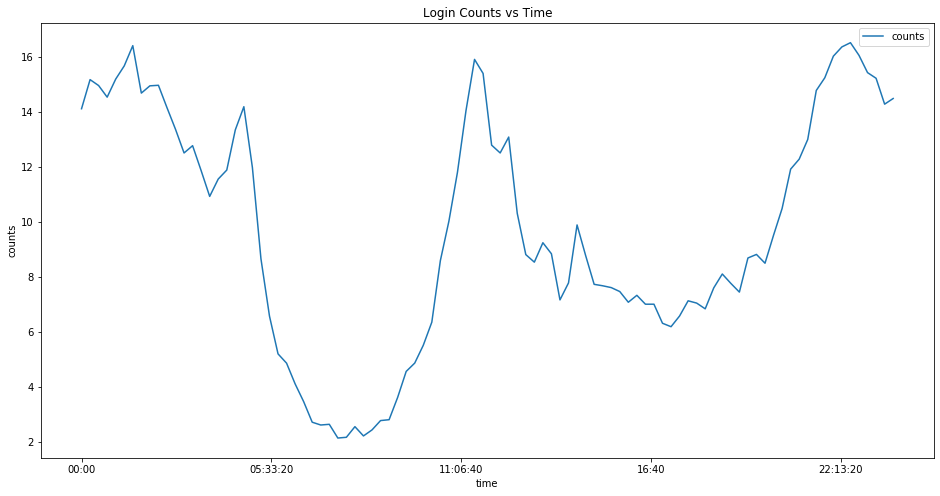

In [8]:
fig, ax = plt.subplots(figsize=(16,8))
df_logins.groupby(['time']).mean().reset_index().plot(x='time', y='counts', ax=ax)
ax.set_ylabel('counts')
ax.set_title('Login Counts vs Time')
plt.show()

**Observation :** There are high number of logins at the start of the day at 00:00 and at 12:00 noon

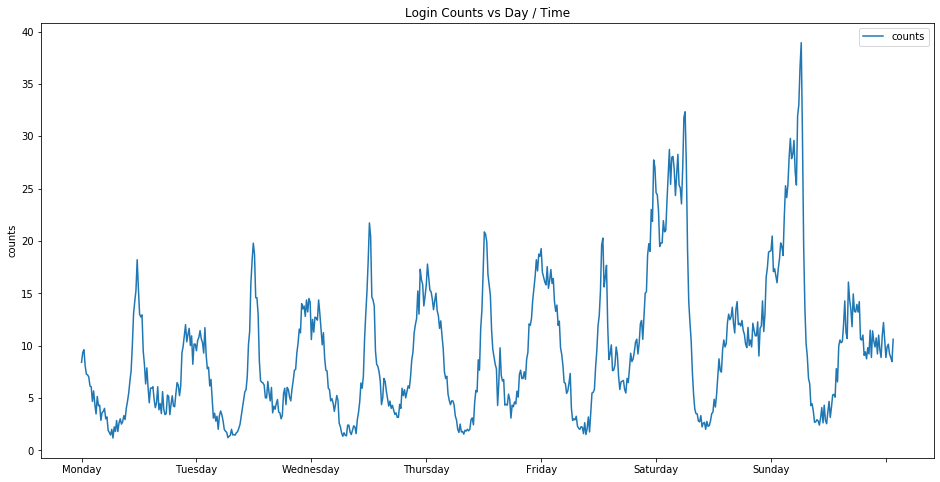

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
df_logins.groupby(['day','time']).mean().reset_index().plot( y='counts', ax=ax)
ax.set_ylabel('counts')
ax.set_xticks(range(0, 670, int(670/7)))
ax.set_xticklabels(weekdays)
ax.set_title('Login Counts vs Day / Time')
plt.show()

**Observation :** There is a steady increase in the number of logins from Monday to Saturday at peak hours

In [10]:
def plots(i):
    fig, ax = plt.subplots(figsize=(16,8))
    df_logins.groupby(['day', 'time']).sum().loc[i].reset_index().plot(x='time', y='counts', ax=ax)
    ax.set_ylabel('counts')
    ax.set_title('Login Counts vs Time for {}'.format(weekdays[i]))
    plt.show()

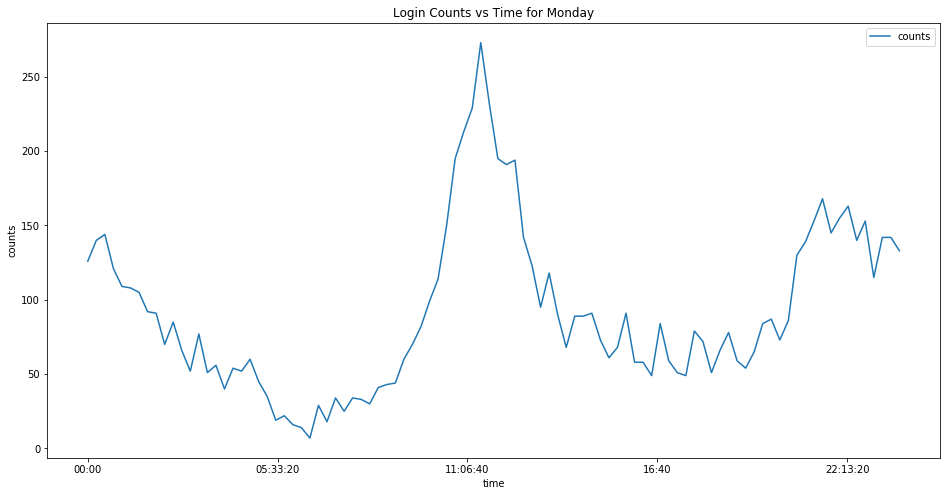

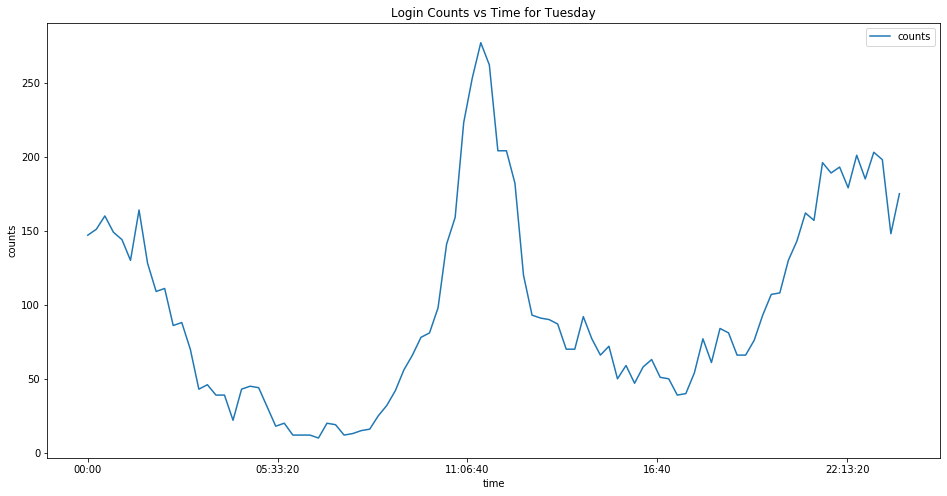

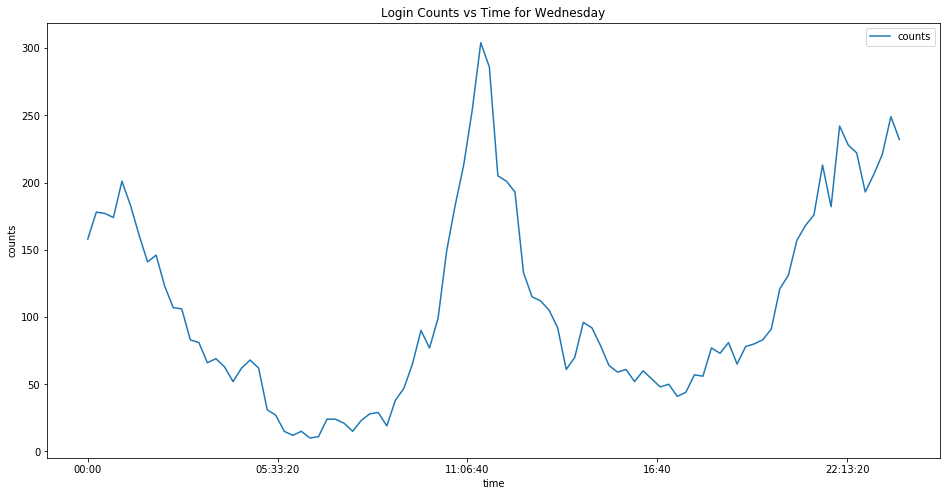

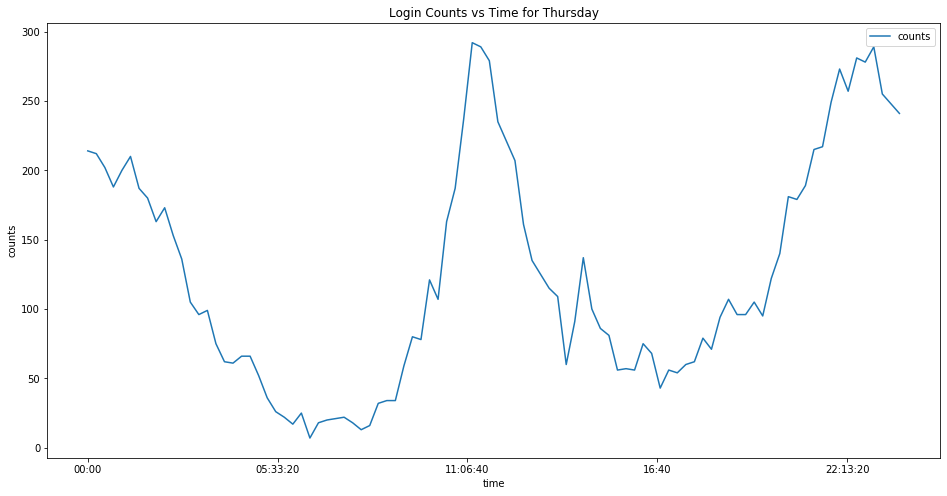

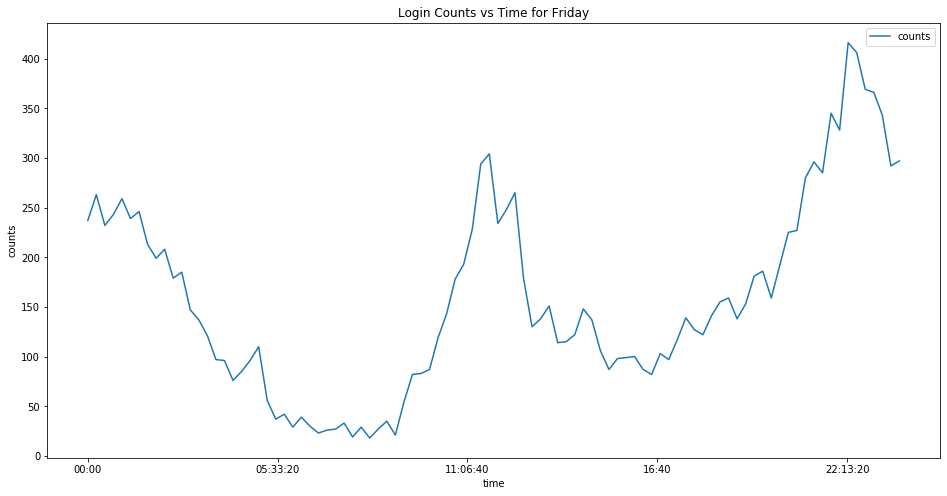

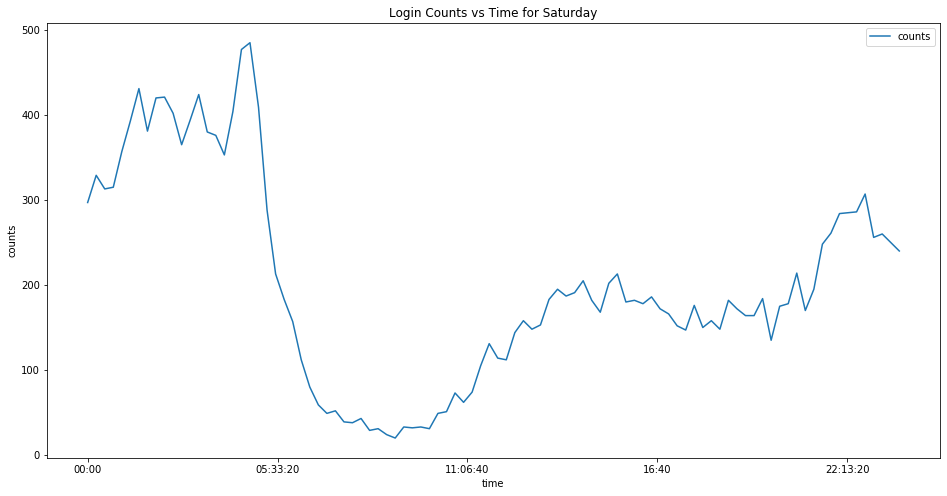

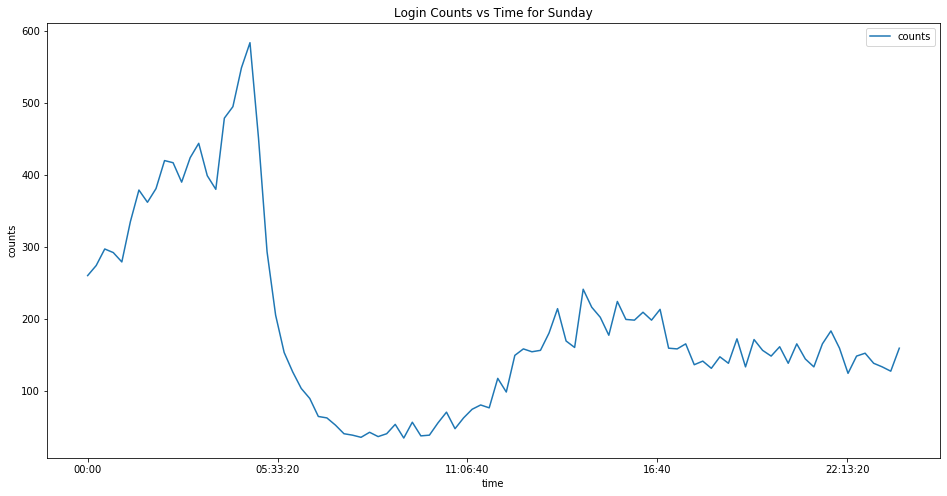

In [11]:
for i in range(7):
    plots(i)

__More Observations :__

**Weekdays :** Monday to Friday the peak is around 00:00 and 12:00 and drops significantly from 5:00 to 8:00 hours

**Weekends :** Saturdays and Sundays the peak is between 04:30 to 05:30 and drops significantly from 6:00 to 9:00 hours

----

# Part 2

**Agenda :**
It is clearly mentioned that the agenda of city managers is to encourage driver partners to be available in both cities. 

**Metric :**
Suppose the agenda of the city managers was to encourage intercity travel, we could have seen a ratio of intercity rides which can be cllected by number to toll crosses to total number of rides. 

But here we assume the availability of drivers in both cases meaning any driver should encourage rides from both the cities without any bias.  Hence we consider a new metric called percentage bias for all the drivers accrross both cities  $r_{city}$, which signifies the flexibility of a driver to ride accross multiple cities:

|$r_{city}$ = ***min***($r_{gotham}$, (1 - $r_{gotham}$))|
| --- |

where $r_{gotham}$ shows the ratio of rides taken from Gotham

If a driver is more bias towards either Gotham or Metropolis this ratio is closer to 0 and if he is more flexible the ratio would be closer to 0.5.

The outcome of this experiment is to test if due to toll reimbursements, this ratio significantly changes towards 0.5.

**Experiment :** 
A/B test woould be conducted for all rides by the drivers accross both the cities. 
There is one thing to be considered while calculating this ratio for drivers, i.e. the driver must have atleast 10 rides in total inorder to wipeout new drivers.

The number of these drivers active in the past 3 weeks can be taken into account, assuming the total riders is around 5000 during this period. 

A fresh set can be calculated for 3 weeks and  $r_{city}$ can be calculated and results can be compared.
We can go with p-test with .95 as level of significance. 

_Null Hypothesis :_ There is no significant change in $r_{city}$ after toll reimbursements.

_Altername Hypothesis :_ There is a significant change in $r_{city}$ after toll reimbursements and $r_{city}$ is significantly closer to 0.5.

**Conclusion :**
After the experiments are conducted and a decision is taken on Null Hypothesis, before directly reporting to city managers, the following things must be ensured.

1. All the drivers (Atleast a significant number of them) accross both cities were aware of this new reimbursement of toll charges policy.

2. Conditions must be checked like if there is any big event going on in a particular city and also condistions such as weather, political unrest, etc must not make riding biased towards a city.

Only if these conditions are met and if we reject the null hypothesis, we can say the experiment is successful to city authorities.

----

# Part 3

In [40]:
df_ultimate = pd.read_json("ultimate_data_challenge.json")
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [41]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Fill _avg_rating_by_driver_ and _avg_rating_of_driver_ missing values by their means and drop missing phone values 

In [42]:
df_ultimate['avg_rating_by_driver'].fillna(df_ultimate['avg_rating_by_driver'].mean(), inplace=True)
df_ultimate['avg_rating_of_driver'].fillna(df_ultimate['avg_rating_of_driver'].mean(), inplace=True)
df_ultimate.dropna(axis=0, inplace=True)

In [43]:
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [44]:
df_ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,4.601482,1.074991,8.875314,60.883832,5.785418,4.777862
std,3.793300,0.565227,0.222666,19.989018,37.086239,5.669709,0.446220
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.700000,100.000000,6.930000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [45]:
print(max(df_ultimate['last_trip_date']))

2014-07-01


Last date recorded is 2014-07-01. So the last 30 days is 2014-06-01

In [46]:
df_ultimate['active'] = [dt > '2014-06-01' for dt in df_ultimate.last_trip_date]
print("Percentage users retained is ", format(df_ultimate['active'].value_counts()[1]/len(df_ultimate)))

Percentage users retained is  0.3665027013950488


Text(0.5, 1.0, 'Users : Active vs Inactive')

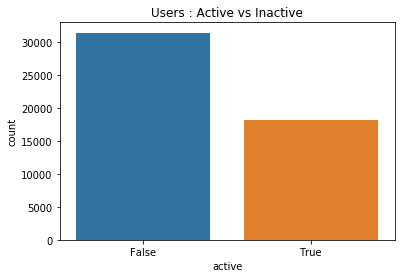

In [47]:
sns.countplot(x='active', data=df_ultimate).set_title("Users : Active vs Inactive")

**Observation :** There are more inactive users than active users

In [48]:
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


active  phone  
False   iPhone     19344
        Android    12080
True    iPhone     15238
        Android     2942
Name: phone, dtype: int64


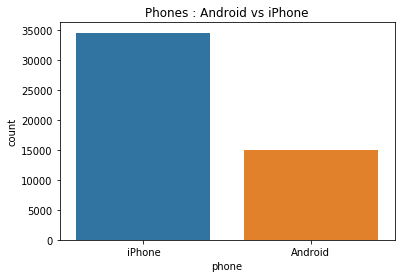

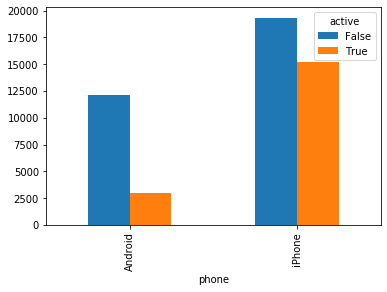

In [49]:
sns.countplot(x='phone', data=df_ultimate).set_title("Phones : Android vs iPhone")
df_ultimate.groupby(['active'])['phone'].value_counts().unstack(0).plot.bar()
print(df_ultimate.groupby(['active'])['phone'].value_counts())

**Observation :** There are more percentage of inactive android users than iphone users

active  city          
False   Winterfell        15207
        Astapor           12420
        King's Landing     3797
True    Winterfell         7918
        King's Landing     6269
        Astapor            3993
Name: city, dtype: int64


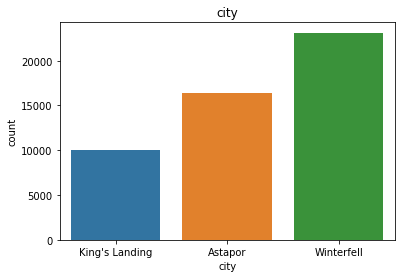

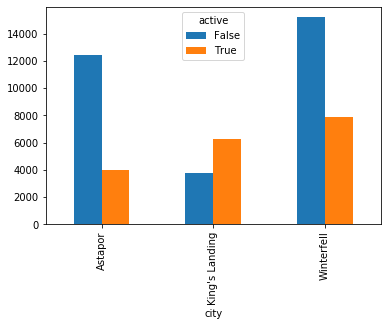

In [22]:
sns.countplot(x='city', data=df_ultimate).set_title("city")
df_ultimate.groupby(['active'])['city'].value_counts().unstack(0).plot.bar()
print(df_ultimate.groupby(['active'])['city'].value_counts())

**Observation :** King's Landing has more percentage of active compare t inactive users and Astapor has least. Winterfall has highest number of total users.

ultimate_black_user  active
False                False     22085
                     True       8907
True                 False      9339
                     True       9273
Name: active, dtype: int64


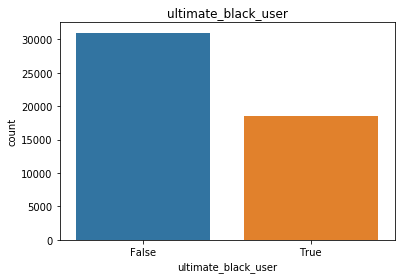

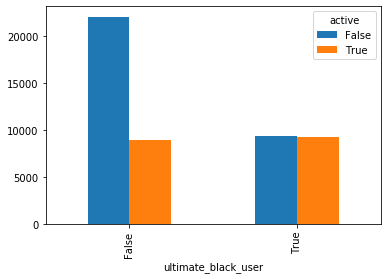

In [23]:
sns.countplot(x='ultimate_black_user', data=df_ultimate).set_title("ultimate_black_user")
df_ultimate.groupby(['active'])['ultimate_black_user'].value_counts().unstack(0).plot.bar()
print(df_ultimate.groupby(['ultimate_black_user'])['active'].value_counts())

**Observation :** Ultimate Black Users are more active than non Ultimate Black users.

In [24]:
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

In [25]:
def plots(field):
    plt.hist(df_ultimate[field])
    plt.title("Plot "+(field))
    plt.xlabel(field)
    plt.ylabel('count')
    plt.show()

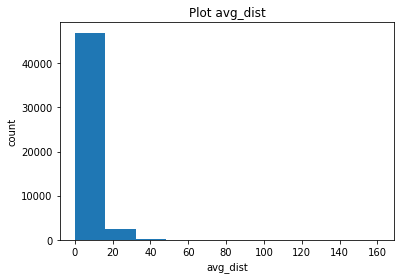

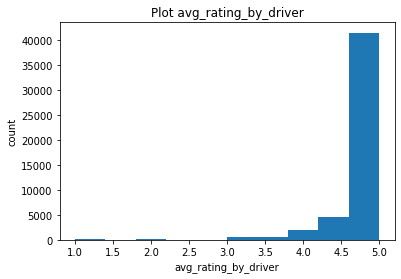

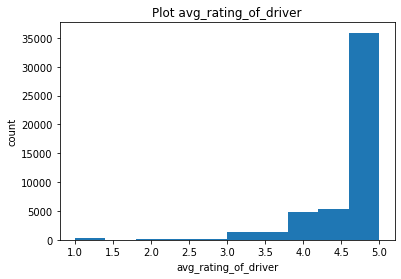

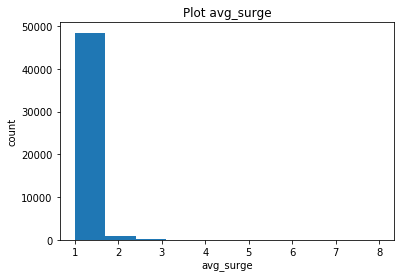

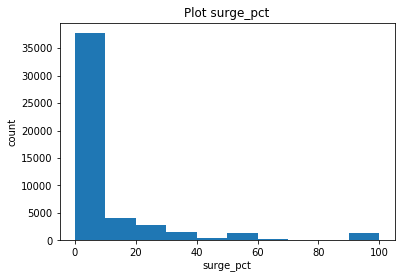

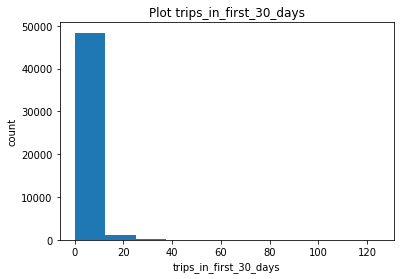

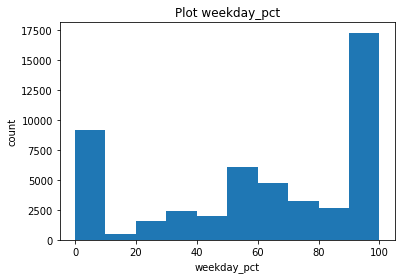

In [26]:
for nf in numerical_features:
    plots(nf)

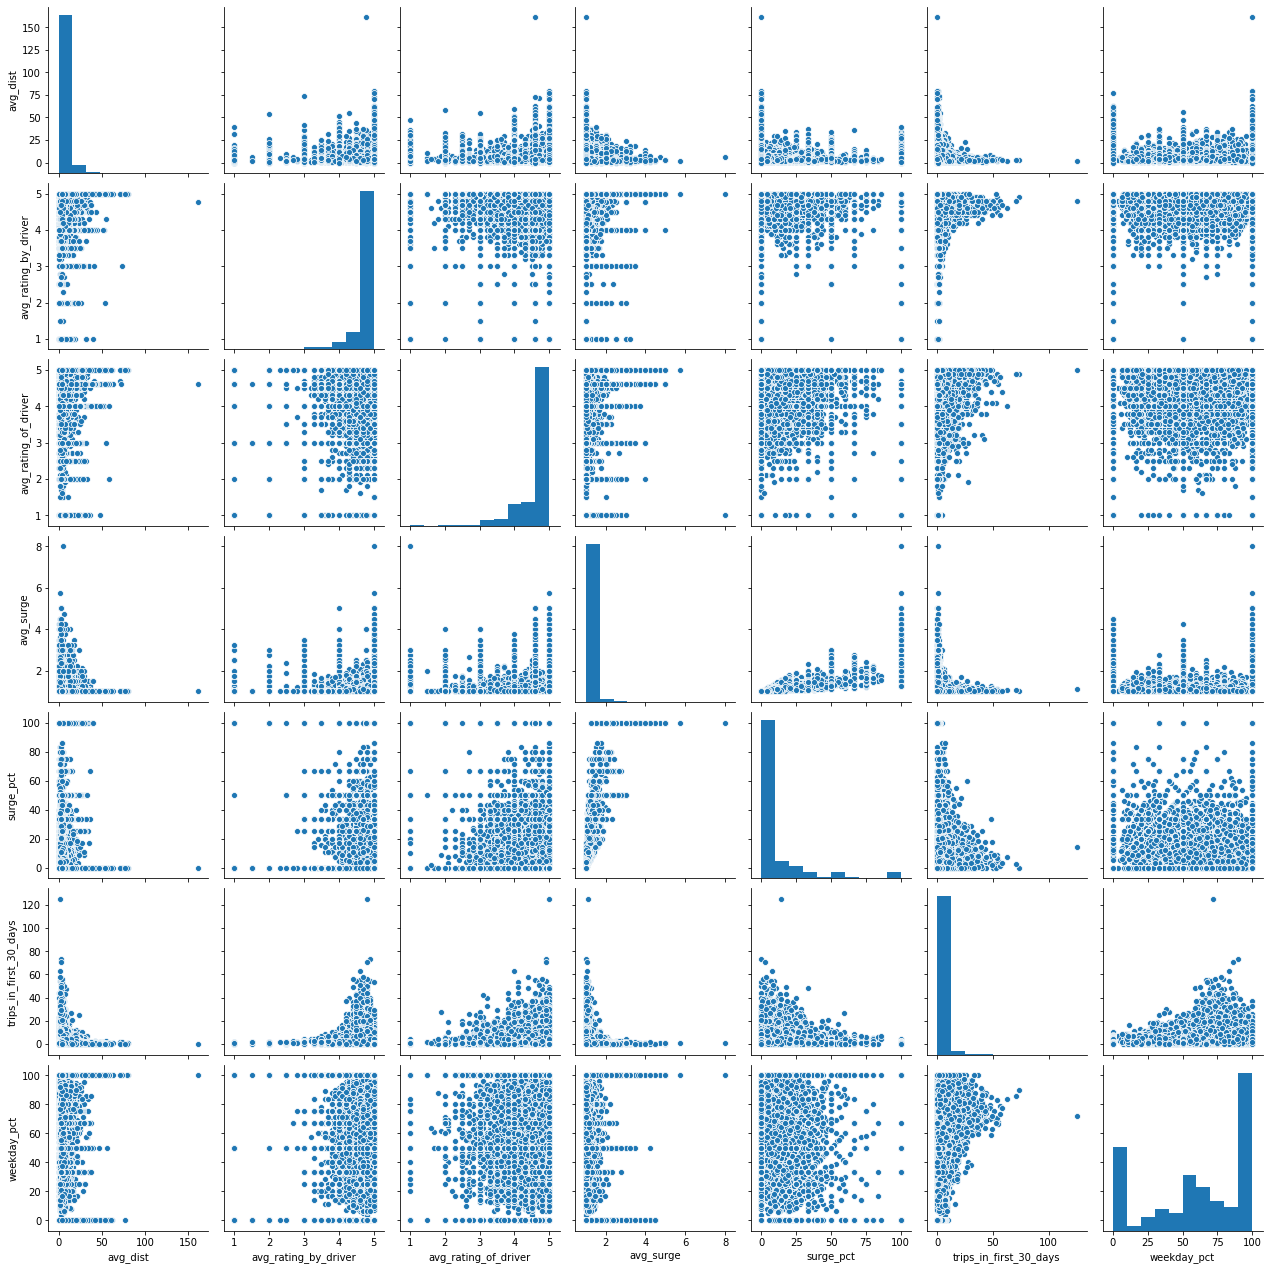

In [27]:
sns.pairplot(df_ultimate[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'weekday_pct']])

#### Model : 

Since the start date is January 2014 for all the signups the 6th month is June and seventh month is July. "Active" field currently correctly points to our target class for to check if a user is active in the seventh month. 

In [50]:
# Drop unnecessary date features
df_ultimate.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [51]:
df_ultimate.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False


In [52]:
df_rf = pd.get_dummies(df_ultimate, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [53]:
X = df_rf.drop('active', axis=1)
y = df_rf['active']

In [54]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0


In [55]:
y.head()

0     True
1    False
2    False
3     True
4    False
Name: active, dtype: bool

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print(X_train.shape)
print(X_test.shape)

(39683, 11)
(9921, 11)


In [57]:
sc = StandardScaler()
X_train.loc[:,["trips_in_first_30_days","avg_rating_of_driver","avg_surge","surge_pct","weekday_pct","avg_dist","avg_rating_by_driver"]] = sc.fit_transform(X_train[["trips_in_first_30_days","avg_rating_of_driver","avg_surge","surge_pct","weekday_pct","avg_dist","avg_rating_by_driver"]])
X_test.loc[:,["trips_in_first_30_days","avg_rating_of_driver","avg_surge","surge_pct","weekday_pct","avg_dist","avg_rating_by_driver"]] = sc.transform(X_test[["trips_in_first_30_days","avg_rating_of_driver","avg_surge","surge_pct","weekday_pct","avg_dist","avg_rating_by_driver"]])

/home/niteesh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/niteesh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
X_train.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
12906,-0.337464,-1.069480,-0.333091,-0.443477,1.055622,0.191439,0.496529,0,0,0,1
36016,0.195195,0.708488,-0.333091,-0.443477,0.159480,1.089775,0.496529,0,0,0,0
46151,-0.071134,-1.069480,0.111253,-0.108234,0.159480,-0.719301,-0.842572,0,1,1,0
2250,-0.337464,0.000073,-0.333091,-0.443477,1.055622,1.591214,0.496529,0,1,0,0
7436,-0.337464,0.708488,0.777770,4.560145,-1.635497,-0.042448,0.496529,0,0,1,0


In [59]:
X_test.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
7344,-0.071134,-1.069480,-0.333091,-0.443477,-1.635497,-0.779545,-0.619388,1,0,1,0
42223,-0.603793,0.708488,-0.333091,-0.443477,1.055622,1.631967,0.496529,1,0,1,0
42630,3.657478,-0.002700,0.066819,0.076900,0.215993,-0.442890,-0.173021,0,0,1,1
28485,-0.603793,0.708488,0.422294,1.222730,0.159480,-0.781317,0.496529,1,0,0,1
18581,2.592160,0.352894,-0.333091,-0.443477,0.651954,0.295979,0.050162,0,1,0,1


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [61]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print(cv_scores)

[0.76578052 0.758095   0.76754441 0.77142137 0.76260081]


In [63]:
n = [20,40,80,160,240]
features = [8, 10, 'auto']
oob = [True, False]
param_grid = {'n_estimators': n, 'max_features': features, 'oob_score': oob}

In [64]:
cv = GridSearchCV(clf, param_grid, cv=5) 
cv.fit(X_train, y_train)
y_predict = cv.predict(X_test) 

/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/niteesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: So

In [66]:
print("Best Parameter: ", cv.best_params_)
print("Best Score: ", cv.best_score_)


Best Parameter:  {'max_features': 8, 'n_estimators': 160, 'oob_score': True}
Best Score:  0.7669783872593448
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      6285
        True       0.69      0.66      0.68      3636

    accuracy                           0.77      9921
   macro avg       0.75      0.74      0.75      9921
weighted avg       0.77      0.77      0.77      9921

0.7671605684910795


**Clasification Report:**

In [67]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

       False       0.81      0.83      0.82      6285
        True       0.69      0.66      0.68      3636

    accuracy                           0.77      9921
   macro avg       0.75      0.74      0.75      9921
weighted avg       0.77      0.77      0.77      9921



In [68]:
print("Test Accuracy ", accuracy_score(y_test, y_predict))

Test Accuracy  0.7671605684910795


In [73]:
confusion_matrix(y_test, y_predict)

array([[5205, 1080],
       [1230, 2406]])

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [83]:
y_predict

array([False,  True,  True, ..., False, False,  True])

Text(0.5, 1.0, 'ROC Curve')

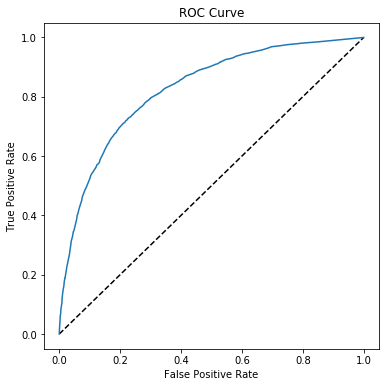

In [90]:
y_pred = cv.best_estimator_.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [81]:
print("AUC:",roc_auc_score(y_test, y_pred))

AUC: 0.8245637411792094


In [89]:
cv.best_estimator_.feature_importances_

array([0.06933648, 0.08074376, 0.04718541, 0.08013786, 0.11678045,
       0.29717962, 0.15339646, 0.07187884, 0.01808684, 0.03756765,
       0.02770663])

In [98]:
features = pd.DataFrame(list(zip(X.columns, cv.best_estimator_.feature_importances_)), columns = ['Feature', 'Importance'])
features.sort_values(by='Importance', ascending=False)

,Feature,Importance
5,avg_dist,0.297180
6,avg_rating_by_driver,0.153396
4,weekday_pct,0.116780
1,avg_rating_of_driver,0.080744
3,surge_pct,0.080138
7,city_King's Landing,0.071879
0,trips_in_first_30_days,0.069336
2,avg_surge,0.047185
9,phone_iPhone,0.037568
10,ultimate_black_user_True,0.027707


The 3 most important features are : 
1. avg_dist: the average distance in miles per trip taken in the first 30 days after signup
2. avg_rating_by_driver: the rider’s average rating over all of their trips
3. weekday_pct: the percent of the user’s trips occurring during a weekday


Ultimate can use these insights to improve their revenue. 
1. King's Landing has a better customer retention but the number of users are less. It can advertise more here to get more users.
2. Riders taking longer rides are more active. Ultimate can think of repricing long distance rides in order to retain customers.
3. iPhone users are more active. If Ultimate could get data and onboard on iphone users, it could increase revenue.
4. Driver's rating for the customer has a hight impact on customer retention. Ultimate must encourage their drivers to rate customers well.
5. Weekday prices and offers could be thought of again as the users riding on weekdays are more active.